In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [72]:
data = pd.read_csv("iris.csv")

numerical_data = data.select_dtypes(include=[np.number]).fillna(0)

normalized_data = normalize(numerical_data)

X = normalized_data

In [73]:
best_eps = None
best_min_samples = None
best_score = -1

eps_values = np.linspace(0.1, 0.5, 20)
min_samples_values = range(2, 40)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Ignore clusters with all noise
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

Best eps: 0.1, Best min_samples: 2, Best Silhouette Score: 0.8040303655962738


In [74]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)
print("Number of clusters:", len(set(dbscan.labels_)))

Number of clusters: 2


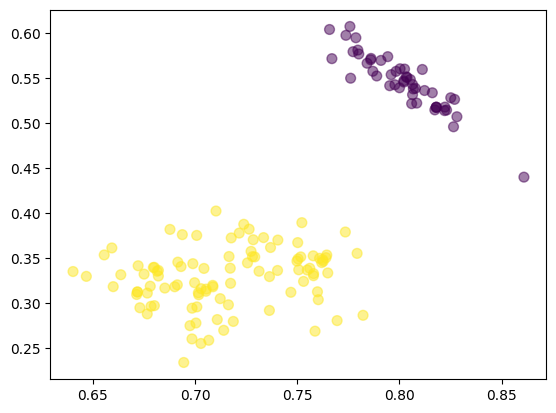

In [75]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='viridis', s=50, alpha=0.5)
plt.show()